In [16]:
# Benchmark stats
import json

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from rdkit import Chem


def plot_scores(x, y):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.stripplot(x=x, y=y, jitter=True, color="black", alpha=0.5)
    plt.show()


RESULTS_PATH = "../../../../synthegy/steer/"

In [17]:
# Some stats about the evaluation set

with open("prompt_specs.json", "r") as f:
    bench = json.load(f)

print(f"Total tasks: {len(bench)}")
dfbench = pd.DataFrame(bench)
dfbench.groupby("smiles").count()

Total tasks: 25


,prompt,id,evaluate,eval_config,config
smiles,,,,,
CC1=CC=C(Cl)C(C(N[C@H](C(O)=O)CNC(CN2C(C=C(F)C(C)=N3)=C3NC2=O)=O)=O)=C1F,3,3,3,3,1
CCN1[C@@H](COC2=CC(C(N(C3C(NC(CC3)=O)=O)C4)=O)=C4C=C2)CCCC1,9,9,5,5,9
CN1CCN(C2=CC=C(N(C3=NC(N(C4=CC=CC(C(C)(C)O)=N4)N(CC=C)C5=O)=C5C=N3)[H])C=C2)CC1,5,5,2,2,5
CP(C1=CC=C(NCC#CC2=CC(C(NC3CCN(CC(N4CCC(CN5CCN(C(C[C@@H]6N=C(C7=CC=C(Cl)C=C7)C(C(C)=C(C)S8)=C8N9C6=NN=C9C)=O)CC5)CC4)=O)CC3)=CC=C%10)=C%10N2CC(F)(F)F)C=C1)(C)=O,8,8,5,5,8


In [18]:
dfbench.groupby(["smiles"]).count()

,prompt,id,evaluate,eval_config,config
smiles,,,,,
CC1=CC=C(Cl)C(C(N[C@H](C(O)=O)CNC(CN2C(C=C(F)C(C)=N3)=C3NC2=O)=O)=O)=C1F,3,3,3,3,1
CCN1[C@@H](COC2=CC(C(N(C3C(NC(CC3)=O)=O)C4)=O)=C4C=C2)CCCC1,9,9,5,5,9
CN1CCN(C2=CC=C(N(C3=NC(N(C4=CC=CC(C(C)(C)O)=N4)N(CC=C)C5=O)=C5C=N3)[H])C=C2)CC1,5,5,2,2,5
CP(C1=CC=C(NCC#CC2=CC(C(NC3CCN(CC(N4CCC(CN5CCN(C(C[C@@H]6N=C(C7=CC=C(Cl)C=C7)C(C(C)=C(C)S8)=C8N9C6=NN=C9C)=O)CC5)CC4)=O)CC3)=CC=C%10)=C%10N2CC(F)(F)F)C=C1)(C)=O,8,8,5,5,8


In [9]:
dfbench

,smiles,prompt,id,evaluate,eval_config,config
0,CC1=CC=C(Cl)C(C(N[C@H](C(O)=O)CNC(CN2C(C=C(F)C...,Late imidazole ring formation,280b79ef56e06a8af1a7d6b72c52148d,RingBreakDepth,"{'target_depth': {'type': 'diff', 'value': 1}}",NaN
1,CC1=CC=C(Cl)C(C(N[C@H](C(O)=O)CNC(CN2C(C=C(F)C...,Early imidazole ring formation,e579d80f176371344bab95ea15e6b9ab,RingBreakDepth,"{'target_depth': {'type': 'diff', 'value': 10}}",NaN
2,CC1=CC=C(Cl)C(C(N[C@H](C(O)=O)CNC(CN2C(C=C(F)C...,No ring formation reaction,1823f3241b82133bbca85d6576cbed65,RingBreakDepth,"{'target_depth': {'type': 'bool', 'value': -1}}","{'iter_lim': 50, 'time_lim': 1000, 'max_tree':..."
3,CCN1[C@@H](COC2=CC(C(N(C3C(NC(CC3)=O)=O)C4)=O)...,"Disconnect the piperidine-2,6-dione system bef...",d1adcbb806bf58cfd56293a867628bd4,RingBreakDepth,"{'target_depth': {'type': 'bool', 'value': -1}}","{'iter_lim': 50, 'time_lim': 1000, 'max_tree':..."
4,CCN1[C@@H](COC2=CC(C(N(C3C(NC(CC3)=O)=O)C4)=O)...,Disconnect the oxoisoindoline ring before the ...,6791544faa03a4c3cbf7a4040d89a2e1,NaN,NaN,"{'iter_lim': 50, 'time_lim': 1000, 'max_tree':..."
5,CCN1[C@@H](COC2=CC(C(N(C3C(NC(CC3)=O)=O)C4)=O)...,Synthesis with exactly 2 ring formation reactions,0c0ea36bcefee71d4956cfc21454fe12,NaN,NaN,"{'iter_lim': 50, 'time_lim': 1000, 'max_tree':..."
6,CCN1[C@@H](COC2=CC(C(N(C3C(NC(CC3)=O)=O)C4)=O)...,Form piperidine and oxoisoindolinone rings in ...,dd7bc734fd02683b3fbd233a2fd73875,MultiRxnCond,"{'allow_piperidine': True, 'allow_oxoisoindoli...","{'iter_lim': 50, 'time_lim': 1000, 'max_tree':..."
7,CCN1[C@@H](COC2=CC(C(N(C3C(NC(CC3)=O)=O)C4)=O)...,Find routes with no ring formations.,c0832f1d769024f69777b7f109bebb5d,MultiRxnCond,"{'allow_piperidine': False, 'allow_oxoisoindol...","{'iter_lim': 50, 'time_lim': 1000, 'max_tree':..."
8,CCN1[C@@H](COC2=CC(C(N(C3C(NC(CC3)=O)=O)C4)=O)...,Get all the rings from commercial sources,cb1673f4eead31e69002292a503c5bb5,NaN,NaN,"{'iter_lim': 50, 'time_lim': 1000, 'max_tree':..."
9,CCN1[C@@H](COC2=CC(C(N(C3C(NC(CC3)=O)=O)C4)=O)...,Only 1 ring formation reaction,0e654459c99472cbfece9306fd04e7bd,NaN,NaN,"{'iter_lim': 50, 'time_lim': 1000, 'max_tree':..."


## Evaluations
How good is VLM at scoring synthesis routes for specified requirements.

**Note that the LLM is prompted to also analyze the reactions and assess feasibility, along with alignment with the query**

# Target

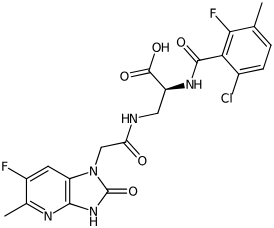

Detect `imidazole ring formation` events.

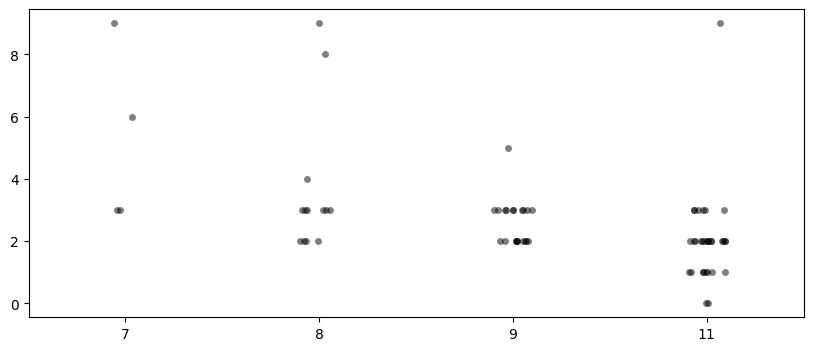

In [6]:
class RingBreakDepth(DepthCondition):
    def hit_condition(self, d):
        return d.get("metadata", {}).get("policy_name") == "ringbreaker"


with open(
    f"{RESULTS_PATH}/fullroute/Early_imidazole_ring_formation.json", "r"
) as f:
    data = json.load(f)

ringbreaker_depth = RingBreakDepth()
gt_score, lmscore = ringbreaker_depth.depth_score(
    data, target_depth=lambda x: abs(x - 10)
)  # Early meanns early in the synthesis - deep in route
plot_scores(gt_score, lmscore)

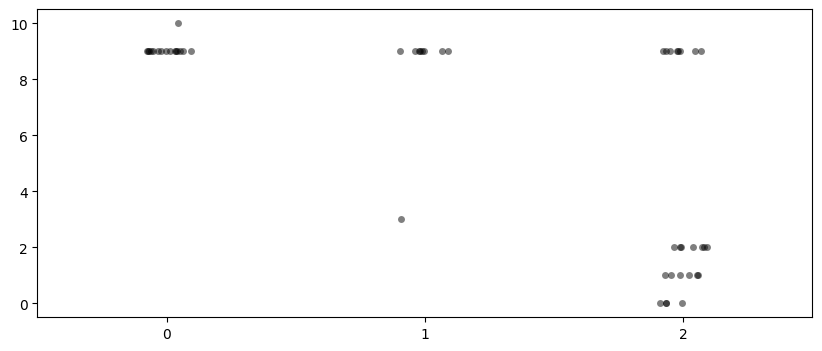

In [7]:
with open(
    f"{RESULTS_PATH}/fullroute/Late_imidazole_ring_formation.json", "r"
) as f:
    data = json.load(f)

ringbreaker_depth = RingBreakDepth()
gt_score, lmscore = ringbreaker_depth.depth_score(
    data, target_depth=lambda x: abs(x - 1)
)  # Late means late in the synthesis - shallow in route
plot_scores(gt_score, lmscore)

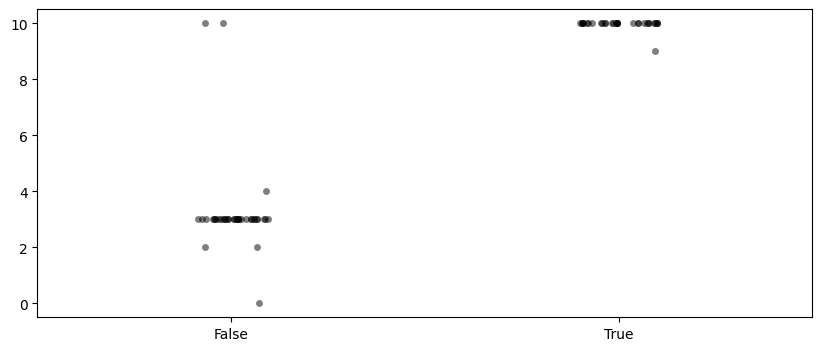

In [8]:
with open(
    f"{RESULTS_PATH}/fullroute/No_ring_formation_reaction.json", "r"
) as f:
    data = json.load(f)

ringbreaker_depth = RingBreakDepth()
gt_score, lmscore = ringbreaker_depth.depth_score(
    data, target_depth=lambda x: x == -1
)  # No ring formation: bool
plot_scores(gt_score, lmscore)

## Target 
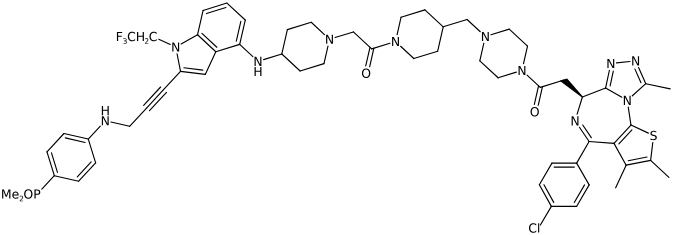

Queries:
- [x] Cut into 2 intermediates of similar size.
    - One contains `piperidine` `indole` and `aniline`.
    - The other contains `tiophenol`, `chlorobenzene`, `diazepine`, `triazole`, `piperazine`, and another `piperidine`.
- [x] Cut into 2 intermediates of similar size.
    - Disconnection made between two `piperidine` rings.
- Cut into 2 intermediates of similar size.
    - Disconnection between `piperazine` and `piperidine`.
- [x] Cut into 2 intermediates of similar size.
    - Disconnection between `diazepine` and `piperazine`.
- Key disconnection made between `indole` and `amino-piperidine` rings.

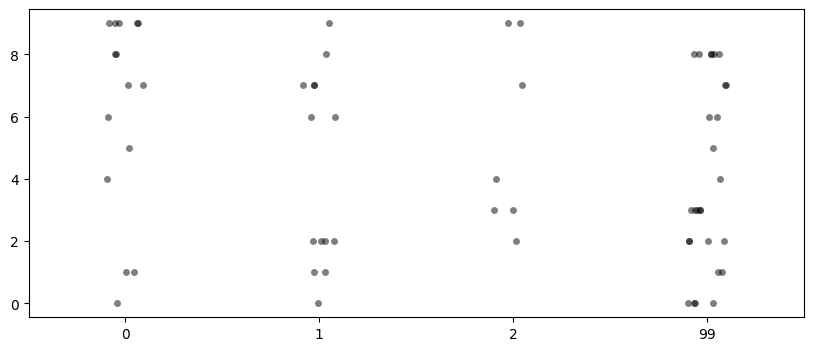

In [11]:
class ComplexQ(DepthCondition):
    def hit_condition(self, d):
        # Here, the question is when the piperidine rings become two separate molecules.
        ring1 = 29  # N29
        ring2 = 33  # N33

        rxn = d["metadata"]["mapped_reaction_smiles"].split(">>")
        prod = Chem.MolFromSmiles(rxn[0])
        reacts = [Chem.MolFromSmiles(r) for r in rxn[1].split(".")]

        if (ring1 in [a.GetAtomMapNum() for a in prod.GetAtoms()]) and (
            ring2 in [a.GetAtomMapNum() for a in prod.GetAtoms()]
        ):
            for r in reacts:
                if (ring1 in [a.GetAtomMapNum() for a in r.GetAtoms()]) ^ (
                    ring2 in [a.GetAtomMapNum() for a in r.GetAtoms()]
                ):
                    return True
        return False


# 0...9 apply, 17...22. 25, 28, 29, 30, 32
with open(
    f"{RESULTS_PATH}/fullroute_no_feasibility/Identify_the_disconnection_strategy_that_will_cut_the_molecule_in_two_similarly_sized_intermediates._The_disconnection_should_be_made_between_two_pipe.json",
    "r",
) as f:
    data = json.load(f)

ringbreaker_depth = ComplexQ()


def route_score(x):
    # Disconnection happens (!=-1), + should happen late-stage roughly
    if x == -1:
        return 99
    return x - 1


gt_score, lmscore = ringbreaker_depth.depth_score(
    data, target_depth=route_score
)
plot_scores(gt_score, lmscore)

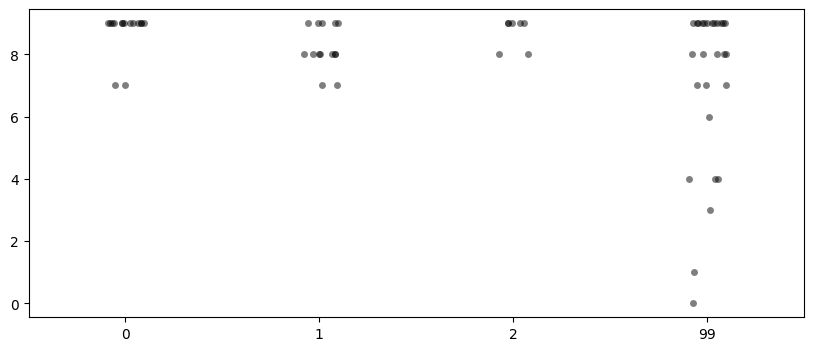

In [12]:
# With these ones we want the same, but prompt is different.
with open(
    f"{RESULTS_PATH}/fullroute_no_feasibility/Identify_the_disconnection_strategy_that_will_cut_the_molecule_in_two_similarly_sized_intermediates._One_intermediate_will_have_piperidine,_indole_and.json",
    "r",
) as f:
    data = json.load(f)

ringbreaker_depth = ComplexQ()
gt_score, lmscore = ringbreaker_depth.depth_score(
    data, target_depth=route_score
)
plot_scores(gt_score, lmscore)

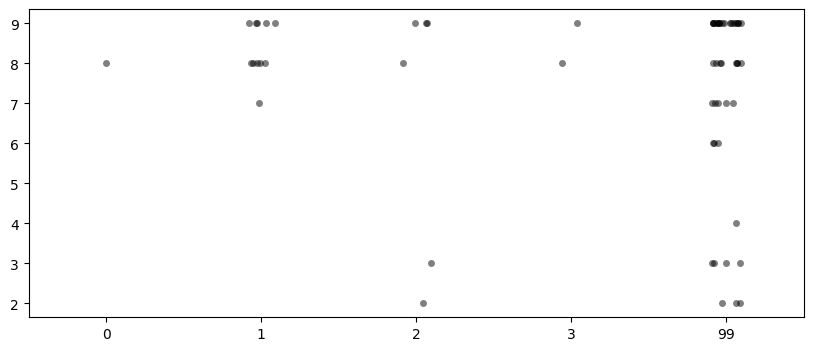

In [13]:
class ComplexQ(DepthCondition):
    def hit_condition(self, d):
        # Here, the question is when the piperidine rings become two separate molecules.
        ring1 = 17  # C17
        ring2 = 21  # N21

        rxn = d["metadata"]["mapped_reaction_smiles"].split(">>")
        prod = Chem.MolFromSmiles(rxn[0])
        reacts = [Chem.MolFromSmiles(r) for r in rxn[1].split(".")]

        if (ring1 in [a.GetAtomMapNum() for a in prod.GetAtoms()]) and (
            ring2 in [a.GetAtomMapNum() for a in prod.GetAtoms()]
        ):
            for r in reacts:
                if (ring1 in [a.GetAtomMapNum() for a in r.GetAtoms()]) ^ (
                    ring2 in [a.GetAtomMapNum() for a in r.GetAtoms()]
                ):
                    return True
        return False


with open(
    f"{RESULTS_PATH}/fullroute_no_feasibility/Identify_the_disconnection_strategy_that_will_cut_the_molecule_in_two_intermediates._The_disconnection_should_be_made_between_diazepine_and_piperazine.json",
    "r",
) as f:
    data = json.load(f)

ringbreaker_depth = ComplexQ()
gt_score, lmscore = ringbreaker_depth.depth_score(
    data, target_depth=route_score
)
plot_scores(gt_score, lmscore)

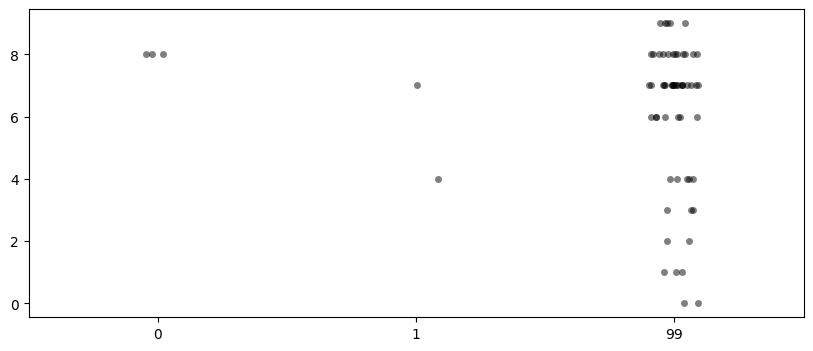

In [14]:
class ComplexQ(DepthCondition):

    def hit_condition(self, d):
        # Here, the question is when the piperidine rings become two separate molecules.
        ring1 = 24  # N24
        ring2 = 26  # C26

        rxn = d["metadata"]["mapped_reaction_smiles"].split(">>")
        prod = Chem.MolFromSmiles(rxn[0])
        reacts = [Chem.MolFromSmiles(r) for r in rxn[1].split(".")]

        if (ring1 in [a.GetAtomMapNum() for a in prod.GetAtoms()]) and (
            ring2 in [a.GetAtomMapNum() for a in prod.GetAtoms()]
        ):
            for r in reacts:
                if (ring1 in [a.GetAtomMapNum() for a in r.GetAtoms()]) ^ (
                    ring2 in [a.GetAtomMapNum() for a in r.GetAtoms()]
                ):
                    return True
        return False


with open(
    f"{RESULTS_PATH}/fullroute_no_feasibility/Identify_the_disconnection_strategy_that_will_cut_the_molecule_in_two_similarly_sized_intermediates._The_disconnection_should_be_made_between_piperazi.json",
    "r",
) as f:
    data = json.load(f)

ringbreaker_depth = ComplexQ()
gt_score, lmscore = ringbreaker_depth.depth_score(
    data, target_depth=route_score
)
plot_scores(gt_score, lmscore)

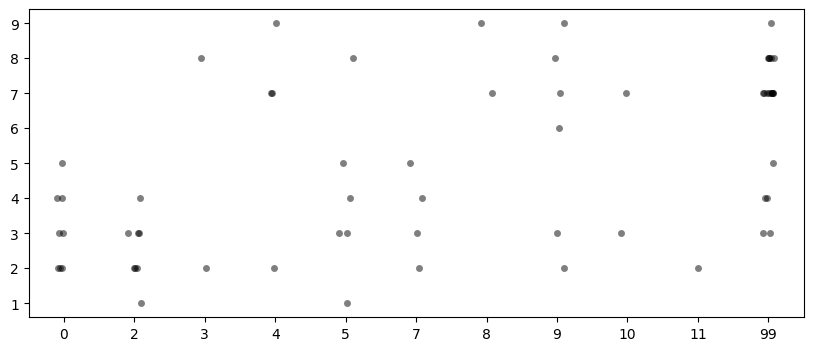

In [15]:
class ComplexQ(DepthCondition):

    def hit_condition(self, d):
        # Here, the question is when the piperidine rings become two separate molecules.
        ring1 = 36  # C36
        ring2 = 38  # C38

        rxn = d["metadata"]["mapped_reaction_smiles"].split(">>")
        prod = Chem.MolFromSmiles(rxn[0])
        reacts = [Chem.MolFromSmiles(r) for r in rxn[1].split(".")]

        if (ring1 in [a.GetAtomMapNum() for a in prod.GetAtoms()]) and (
            ring2 in [a.GetAtomMapNum() for a in prod.GetAtoms()]
        ):
            for r in reacts:
                if (ring1 in [a.GetAtomMapNum() for a in r.GetAtoms()]) ^ (
                    ring2 in [a.GetAtomMapNum() for a in r.GetAtoms()]
                ):
                    return True
        return False


with open(
    f"{RESULTS_PATH}/fullroute_no_feasibility/Identify_the_disconnection_strategy_where_the_key_disconnection_will_be_made_between_indole_and_amino-piperidine_rings.json",
    "r",
) as f:
    data = json.load(f)

ringbreaker_depth = ComplexQ()
gt_score, lmscore = ringbreaker_depth.depth_score(
    data, target_depth=route_score
)
plot_scores(gt_score, lmscore)

## Target 
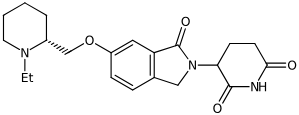

Detect breaking events of `piperidine-2,6-dione`, `oxoisoinidoline`, `piperidine`.

In [19]:
class MultiRxnCondBase:
    """This class is a bit different because it needs to check multiple reactions."""

    def __call__(self, d):
        return self.condition_depth(d["children"][0])

    def detect_piperidine(self, rxn):
        oxoisoindolinone = "C1CN[CH2]CC1"
        return self.detect_specific_break(rxn, oxoisoindolinone)

    def detect_oxoisoindolinone(self, rxn):
        oxoisoindolinone = "c1cC(=O)NC1"
        return self.detect_specific_break(rxn, oxoisoindolinone)

    def detect_pipe26diox(self, rxn):
        pipe26diox = "NC1CCC(=O)NC1=O"
        return self.detect_specific_break(rxn, pipe26diox)

    def detect_specific_break(self, rxn, pattern):
        p = Chem.MolFromSmarts(pattern)
        prod = Chem.MolFromSmiles(rxn.split(">>")[0])
        reac = Chem.MolFromSmiles(rxn.split(">>")[1])
        return prod.HasSubstructMatch(p) and not reac.HasSubstructMatch(p)

    def get_rxns(self, d):
        def _extract_reactions(d):
            if "metadata" in d:
                yield d["metadata"]["mapped_reaction_smiles"]
                for c in d["children"]:
                    if "children" in c:
                        for r in _extract_reactions(c["children"][0]):
                            yield r

        reactions = list(_extract_reactions(d))
        return reactions

    def is_condition_met(self, data):
        """For all routes found (and scored) in the data, find the depth at which the hit condition is met, and plot."""

        conds, lengths, score = [], [], []
        for d in data:
            cond, length = self(d)
            conds.append(cond)
            lengths.append(length)
            score.append(d["lmdata"]["routescore"])
        return conds, lengths, score

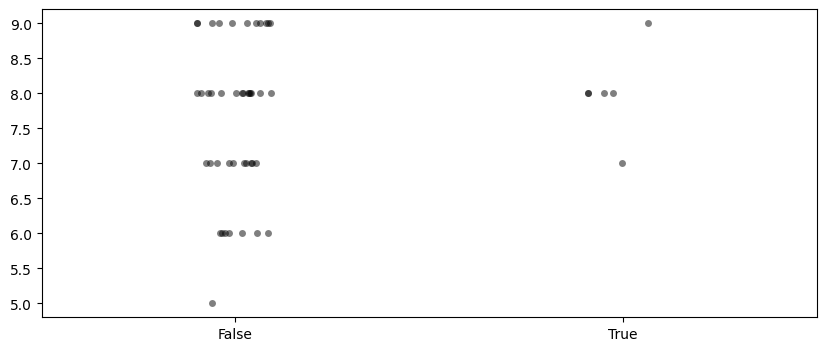

In [20]:
with open(
    f"{RESULTS_PATH}/fullroute/Form_piperidine-2,6-dione_and_oxoisoindolinone_rings_in_the_retrosynthesis._Get_the_piperidine_ring_.json",
    "r",
) as f:
    data = json.load(f)


class MultiRxnCond(MultiRxnCondBase):
    def condition_depth(self, d):
        """Extract all the reactions from tree, and find if condition is met."""
        reactions = self.get_rxns(d)

        oxo = any(self.detect_oxoisoindolinone(r) for r in reactions)
        pipe26 = any(self.detect_pipe26diox(r) for r in reactions)
        pip = any(self.detect_piperidine(r) for r in reactions)
        return (oxo and pipe26) and (not pip), len(reactions)


ringbreaker_depth = MultiRxnCond()
gt_score, length, lmscore = ringbreaker_depth.is_condition_met(data)
plot_scores(gt_score, lmscore)

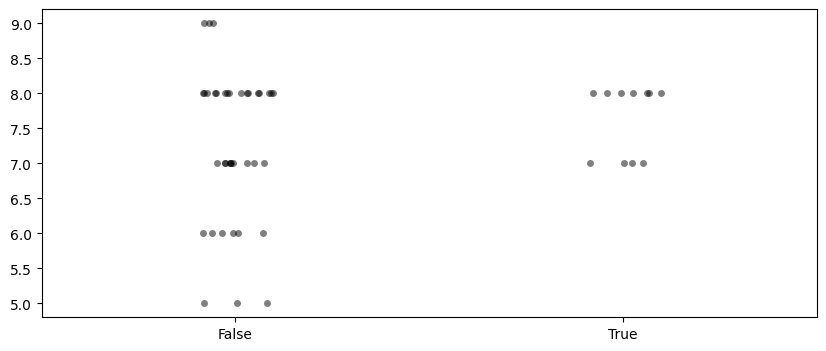

In [24]:
with open(
    f"{RESULTS_PATH}/fullroute/Form_piperidine_and_oxoisoindolinone_rings_in_the_synthesis._Get_the_piperidine-2,6-dione_from_comme.json",
    "r",
) as f:
    data = json.load(f)


class MultiRxnCond_single(MultiRxnCondBase):
    def condition_depth(self, d):
        """Extract all the reactions from tree, and find if condition is met."""
        reactions = self.get_rxns(d)

        oxo = any(self.detect_oxoisoindolinone(r) for r in reactions)
        pipe26 = any(self.detect_pipe26diox(r) for r in reactions)
        pip = any(self.detect_piperidine(r) for r in reactions)
        return (oxo and pip) and (not pipe26), len(reactions)


ringbreaker_depth = MultiRxnCond_single()
gt_score, length, lmscore = ringbreaker_depth.is_condition_met(data)
plot_scores(gt_score, lmscore)

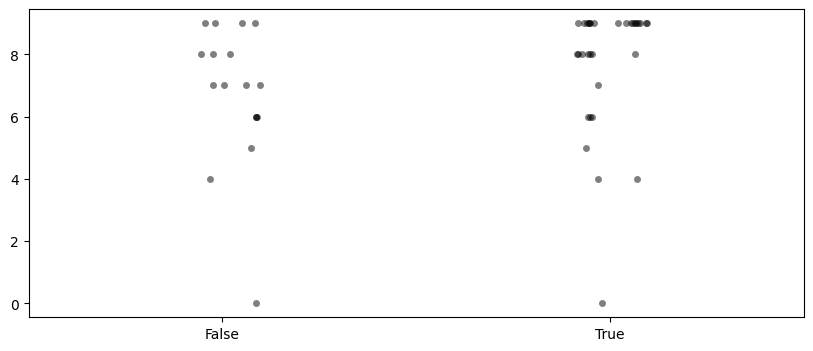

In [25]:
with open(
    f"{RESULTS_PATH}/fullroute/Form_only_oxoisoindolinone_ring_in_synthesis._Get_piperidine-2,6-dione_and_piperidine_rings_from_com.json",
    "r",
) as f:
    data = json.load(f)


class MultiRxnCond_single(MultiRxnCondBase):
    def condition_depth(self, d):
        """Extract all the reactions from tree, and find if condition is met."""
        reactions = self.get_rxns(d)

        oxo = any(self.detect_oxoisoindolinone(r) for r in reactions)
        pipe26 = any(self.detect_pipe26diox(r) for r in reactions)
        pip = any(self.detect_piperidine(r) for r in reactions)
        return (oxo) and (not pipe26) and (not pip), len(reactions)


ringbreaker_depth = MultiRxnCond_single()
gt_score, length, lmscore = ringbreaker_depth.is_condition_met(data)
plot_scores(gt_score, lmscore)

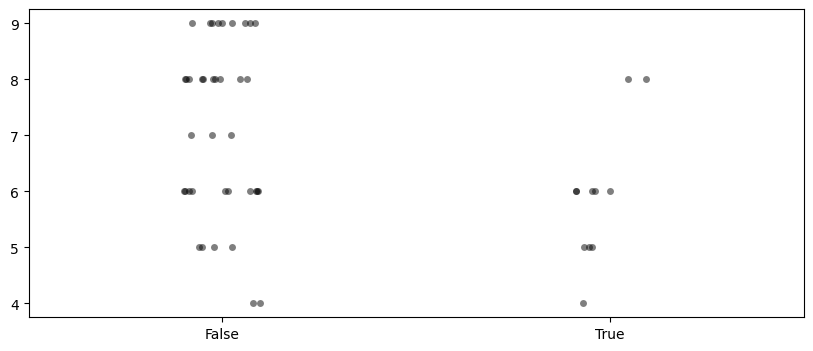

In [26]:
with open(
    f"{RESULTS_PATH}/fullroute/Form_piperidine_and_oxoisoindolinone_rings_in_the_synthesis._Make_sure_that_oxoisoindolinone_is_crea.json",
    "r",
) as f:
    data = json.load(f)


class MultiRxnCond_single(MultiRxnCondBase):
    def condition_depth(self, d):
        """Extract all the reactions from tree, and find if condition is met."""
        reactions = self.get_rxns(d)

        oxo = any(self.detect_oxoisoindolinone(r) for r in reactions)
        pipe26 = any(self.detect_pipe26diox(r) for r in reactions)
        pip = any(self.detect_piperidine(r) for r in reactions)
        return (oxo and pip) and (not pipe26), len(reactions)


ringbreaker_depth = MultiRxnCond_single()
gt_score, length, lmscore = ringbreaker_depth.is_condition_met(data)
plot_scores(gt_score, lmscore)

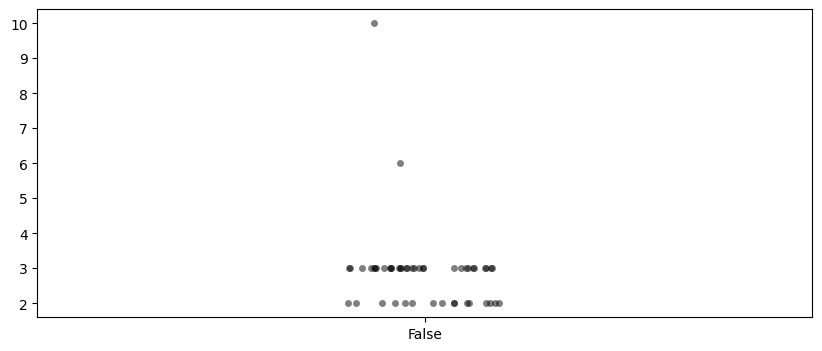

In [27]:
with open(
    f"{RESULTS_PATH}/fullroute/Find_routes_with_no_ring_formations..json", "r"
) as f:
    data = json.load(f)


class MultiRxnCond_single(MultiRxnCondBase):
    def condition_depth(self, d):
        """Extract all the reactions from tree, and find if condition is met."""
        reactions = self.get_rxns(d)

        oxo = any(self.detect_oxoisoindolinone(r) for r in reactions)
        pipe26 = any(self.detect_pipe26diox(r) for r in reactions)
        pip = any(self.detect_piperidine(r) for r in reactions)
        return (not oxo) and (not pip) and (not pipe26), len(reactions)


ringbreaker_depth = MultiRxnCond_single()
gt_score, length, lmscore = ringbreaker_depth.is_condition_met(data)
plot_scores(gt_score, lmscore)

### Fair for this. None of the routes are without ring breaking.

At least the model ranks them low. Now, there are some interesting routes with score of 10 or 9?

Checking the LLM output, the LLM simply failed.